# <u> Investigating How Shooting Metrics Are Related In The NBA </u>

### This project aims to analyse the 2022-2023 NBA Player Stats dataset to discover if there is any correlation between players Two-Pointer, Three-Pointer, and Free Throw percentages  



### <u> Key Terms: </u>
- #### Free Throw: A foul shot that are unopposed attempts to score points by shooting from behind the free-throw line
- #### Field Goal: a basket scored from any part of the court during live play (excludes free throws)
- #### Three-Pointers: A three-point field goal is a basket made from beyond the three-point line
- #### Two-Pointers: A two-point field goal is a basket made from inside the three-point line

### <u> Table Columns: </u>
- #### FG : Field goals per game
- #### FGA : Field goal attempts per game
- #### FG% : Field goal percentage
- #### 3P : 3-point field goals per game
- #### 3PA : 3-point field goal attempts per game
- #### 3P% : 3-point field goal percentage
- #### 2P : 2-point field goals per game
- #### 2PA : 2-point field goal attempts per game
- #### 2P% : 2-point field goal percentage
- #### eFG% : Effective field goal percentage
- #### FT : Free throws per game
- #### FTA : Free throw attempts per game
- #### FT% : Free throw percentage

#### Link to kaggle dataset: https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular?select=2022-2023+NBA+Player+Stats+-+Regular.csv

In [1]:
# Load in libraries and the data set into a DataFrame
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("2022-2023 NBA Player Stats.csv", encoding='latin-1', sep=';')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


# <u> Data Cleaning </u>

## The process of cleaning this dataset if relatively short. We need to:
- Drop the columns we don't need
- Drop or fill null values
- Remove duplicated players

In [2]:
# drop the columns we do not need to analyse the players stats

df.drop(columns=["Rk", "Pos", "Age", "Tm", "G", "GS", "MP", "G", "ORB", 
                 "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"], axis=1, inplace=True)
df

,Player,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
0,Precious Achiuwa,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702
1,Steven Adams,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364
2,Bam Adebayo,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806
3,Ochai Agbaji,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812
4,Santi Aldama,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,Thaddeus Young,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,0.561,0.3,0.5,0.692
675,Trae Young,8.2,19.0,0.429,2.1,6.3,0.335,6.1,12.7,0.476,0.485,7.8,8.8,0.886
676,Omer Yurtseven,1.8,3.0,0.593,0.3,0.8,0.429,1.4,2.2,0.650,0.648,0.6,0.7,0.833
677,Cody Zeller,2.5,3.9,0.627,0.0,0.1,0.000,2.5,3.8,0.649,0.627,1.6,2.3,0.686


In [3]:
# there are no null values in our data

df.isnull().sum().sort_values()

Player    0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
dtype: int64

In [4]:
# duplicates indicate a player moved teams 
# the first occurance of a duplicated player is their stats averaged across the teams they played for
# we only want their averaged stats across all teams they played for and not their stats on each of their teams

df = df.drop_duplicates(subset=['Player'], keep='first')

# Data Analysis

In [5]:
# we only want to compare players who have shot over a threshold number of 3P, 2P and FT
# players lower than this threshold are not good representations due to very small sample size

def threshold(df, part):
    if part == 1:
        new_df = df[ (df["3PA"] > 1.5) & (df["FTA"] > 3.5) ]
    elif part == 2:
        new_df = df[ (df["2PA"] > 5.5) & (df["FTA"] > 3.5) ]
    else:
        new_df = df[ (df["2PA"] > 5.5) & (df["3PA"] > 1.5) ]
        
    return new_df    

In [6]:
# compute two means from the best performing half and worst performing half in the dataframe
# this is so we can compare how averages move with each other

def compute_averages(df, part):
    half = int(df.shape[0]/2)
    
    # the two columns we want to compare means
    if part == 1:
        column1 = "3P%"
        column2 = "FT%"
    elif part == 2:
        column1 = "2P%"
        column2 = "FT%"
    else:
        column1 = "2P%"
        column2 = "3P%"
          
    # separate the dataframe into two. Best performing and worst performing.
    top_half = df.sort_values(column1, ascending=False).iloc[0:half]
    bottom_half = df.sort_values(column1).iloc[0:half]

    # get an average of our first column for both halves of dataframe
    top_average = round(top_half[column1].mean()*100, 0)
    bottom_average = round(bottom_half[column1].mean()*100, 0)
    
    # get an average of our second column for both halves of dataframe
    top_average2 = round(top_half[column2].mean()*100, 0)
    bottom_average2 = round(bottom_half[column2].mean()*100, 0)

    print("Top " + str(half) + " " + column1)
    print("Average " + column1 + " " + str(top_average) + "% ")
    print("Average " + column2 + " " + str(top_average2) + "% ")
    print("")
    print("Bottom " + str(half) + " " + column1)
    print("Average " + column1 + " " + str(bottom_average) + "% ")
    print("Average " + column2 + " " + str(bottom_average2) + "% ")

# Part 1

In [7]:
# only players with more than 1.5 3PA and more than 3.5 FTA 

df_3p_ft = threshold(df, 1)
df_3p_ft

,Player,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
12,Giannis Antetokounmpo,11.2,20.3,0.553,0.7,2.7,0.275,10.5,17.6,0.596,0.572,7.9,12.3,0.645
28,Paolo Banchero,6.7,15.6,0.427,1.2,4.0,0.298,5.5,11.6,0.471,0.465,5.5,7.4,0.738
32,Harrison Barnes,4.6,9.6,0.473,1.6,4.3,0.374,3.0,5.3,0.553,0.556,4.3,5.0,0.847
34,RJ Barrett,7.0,16.1,0.434,1.7,5.3,0.310,5.3,10.8,0.495,0.485,4.0,5.4,0.740
44,Bradley Beal,8.9,17.6,0.506,1.6,4.4,0.365,7.3,13.2,0.552,0.551,3.8,4.6,0.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Fred VanVleet,6.3,16.1,0.393,3.0,8.8,0.342,3.3,7.3,0.455,0.486,3.7,4.1,0.898
624,Franz Wagner,6.8,14.0,0.485,1.6,4.5,0.361,5.2,9.5,0.544,0.543,3.4,4.0,0.842
642,Russell Westbrook,5.9,13.6,0.436,1.2,3.9,0.311,4.7,9.7,0.487,0.481,2.8,4.3,0.656
670,Christian Wood,5.9,11.5,0.515,1.6,4.2,0.376,4.3,7.3,0.594,0.583,3.2,4.2,0.772


In [8]:
# compute an average 3P and FT percentage from the best 3P shooters and worst 3P shooters in the dataframe

compute_averages(df_3p_ft, 1)

Top 32 3P%
Average 3P% 39.0% 
Average FT% 85.0% 

Bottom 32 3P%
Average 3P% 33.0% 
Average FT% 79.0% 


### The top 3P% players have a greater FT% than the bottom 3P% players which implies as 3P% increases, FT% will also increase. 

# Visualisation 1

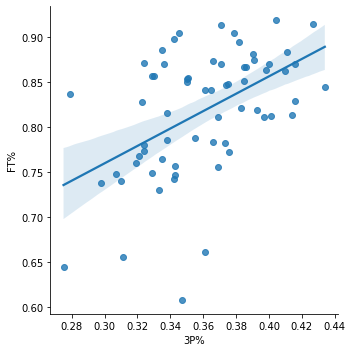

In [9]:
sns.lmplot(data=df_3p_ft, x="3P%", y="FT%")

### The graph shows clear positive correlation between 3P% and FT%. This visualisation provides a better understanding to what degree the data is correlated

# Part 2

In [10]:
# only players with more than 5.5 2PA and more than 3.5 FTA 

df_2p_ft = threshold(df, 2)
df_2p_ft

,Player,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
2,Bam Adebayo,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806
12,Giannis Antetokounmpo,11.2,20.3,0.553,0.7,2.7,0.275,10.5,17.6,0.596,0.572,7.9,12.3,0.645
28,Paolo Banchero,6.7,15.6,0.427,1.2,4.0,0.298,5.5,11.6,0.471,0.465,5.5,7.4,0.738
34,RJ Barrett,7.0,16.1,0.434,1.7,5.3,0.310,5.3,10.8,0.495,0.485,4.0,5.4,0.740
44,Bradley Beal,8.9,17.6,0.506,1.6,4.4,0.365,7.3,13.2,0.552,0.551,3.8,4.6,0.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,Franz Wagner,6.8,14.0,0.485,1.6,4.5,0.361,5.2,9.5,0.544,0.543,3.4,4.0,0.842
642,Russell Westbrook,5.9,13.6,0.436,1.2,3.9,0.311,4.7,9.7,0.487,0.481,2.8,4.3,0.656
664,Zion Williamson,9.8,16.2,0.608,0.2,0.7,0.368,9.6,15.5,0.618,0.615,6.1,8.6,0.714
670,Christian Wood,5.9,11.5,0.515,1.6,4.2,0.376,4.3,7.3,0.594,0.583,3.2,4.2,0.772


In [11]:
# compute an average 2P and FT percentage from the best 2P shooters and worst 2P shooters in the dataframe

compute_averages(df_2p_ft, 2)

Top 35 2P%
Average 2P% 59.0% 
Average FT% 79.0% 

Bottom 35 2P%
Average 2P% 51.0% 
Average FT% 82.0% 


### This data implies the opposite to the previous. Our top 2P% players have a worse average FT% compared to our bottom 2P% players. The FT% from both groups are fairly close to each other so it is hard to determine if the data is negatively correlated or no correlation

# Visualisation 2

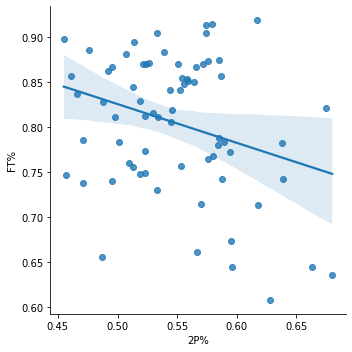

In [12]:
sns.lmplot(data=df_2p_ft, x="2P%", y="FT%")

### The graph shows vague negative correlation between 2P% and FT%. We can make the conclusion that as 2P% increases, FT% decreases despite the correlation not being strong

# Part 3

In [13]:
# only players with more than 5.5 2PA and more than 1.5 3PA 

df_2p_3p = threshold(df, 3) 
df_2p_3p

,Player,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
12,Giannis Antetokounmpo,11.2,20.3,0.553,0.7,2.7,0.275,10.5,17.6,0.596,0.572,7.9,12.3,0.645
14,Cole Anthony,4.6,10.2,0.454,1.3,3.4,0.364,3.4,6.7,0.500,0.516,2.5,2.8,0.894
15,OG Anunoby,6.3,13.2,0.476,2.1,5.5,0.387,4.2,7.7,0.539,0.556,2.1,2.5,0.838
22,Marvin Bagley III,4.8,9.1,0.529,0.5,1.6,0.288,4.4,7.5,0.579,0.554,1.9,2.6,0.750
24,LaMelo Ball,8.2,20.0,0.411,4.0,10.6,0.376,4.2,9.4,0.450,0.510,2.8,3.4,0.836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,Andrew Wiggins,6.8,14.3,0.473,2.4,6.1,0.396,4.4,8.2,0.530,0.557,1.2,1.9,0.611
655,Jalen Williams,5.5,10.6,0.521,1.0,2.7,0.356,4.5,7.9,0.579,0.567,2.1,2.5,0.812
657,Jeenathan Williams,4.8,7.8,0.615,0.6,1.6,0.375,4.2,6.2,0.677,0.654,0.4,0.6,0.667
670,Christian Wood,5.9,11.5,0.515,1.6,4.2,0.376,4.3,7.3,0.594,0.583,3.2,4.2,0.772


In [14]:
# compute an average 2P and 3P percentage from the best 2P shooters and worst 2P shooters in the dataframe

compute_averages(df_2p_3p, 3)

Top 59 2P%
Average 2P% 57.0% 
Average 3P% 37.0% 

Bottom 59 2P%
Average 2P% 49.0% 
Average 3P% 35.0% 


### The results may imply that as 2P% increases, 3P% also increases. There is a large increase in 2P% between the groups compared to the increase in 3P% so it is unlikely we can make the conclusion that these two variables are positively correlated

# Visualisation 3

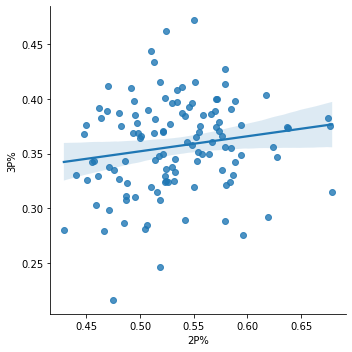

In [15]:
sns.lmplot(data=df_2p_3p, x="2P%", y="3P%")

### The graph shows weak positive correlation between 2P% and 3P% therefore we do not have enough evidence to make the conclusion that the variables are positively correlated. 

# <u> Conclusion: </u>
- 3P% and FT% have a positively correlated relationship
- 2P% and FT% have a negatively correlated relationship
- 2P% and 3P% do not have a correlated relationship

### Further Work: Collecting data from past seasons to see how these relationships change under time series